In [1]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [4]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
data_scaled = StandardScaler().fit_transform(market_data_df)

In [6]:
# Create a DataFrame with the scaled data
market_data_scaled= pd.DataFrame(data_scaled, columns=market_data_df.columns)

# Copy the crypto names from the original data
market_data_scaled['coin_id'] = market_data_df.index

# Set the coinid column as index
market_data_scaled.set_index('coin_id', inplace = True)

# Display sample data
market_data_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

In [ ]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values_list = list(range(1,12))

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
for k in k_values_list:
    model = KMeans(n_clusters=k, n_init='auto', random_state=1)
    model.fit(market_data_scaled)
    inertia.append(model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_curve_dict = {'k': k_values_list, 'inertia':inertia}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df= pd.DataFrame(elbow_curve_dict)

# Display the DataFrame
elbow_df

<Axes: xlabel='k'>

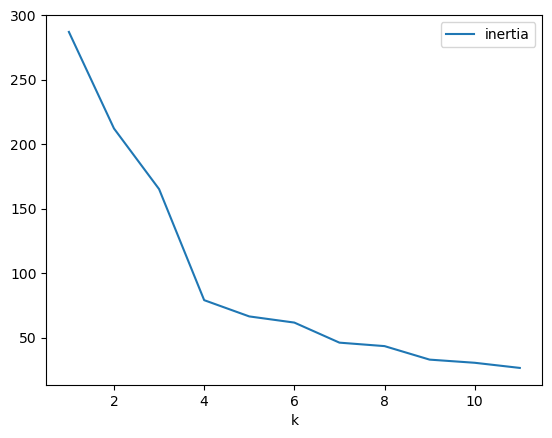

In [11]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_df.plot(
    x='k',
    y='inertia'
)

#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer: 4

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [12]:
# Initialize the K-Means model using the best value for k
k_value = KMeans(n_clusters=4, n_init="auto")

In [13]:
# Fit the K-Means model using the scaled data
k_value.fit(market_data_scaled)

c:\Users\Natalii\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, n_init='auto')

In [14]:
# Predict the clusters to group the cryptocurrencies using the scaled data
predict_cluster = k_value.predict(market_data_scaled)

# View the resulting array of cluster values.
predict_cluster

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 3, 1, 0, 0, 2, 0, 0, 0, 0])

In [15]:
# Create a copy of the DataFrame
cluster_df = market_data_scaled.copy()

In [17]:
# Add a new column to the DataFrame with the predicted clusters
cluster_df['k4_predicted_cluster'] = predict_cluster

# Display sample data
cluster_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,k4_predicted_cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,1
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,1
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,1


<Axes: xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

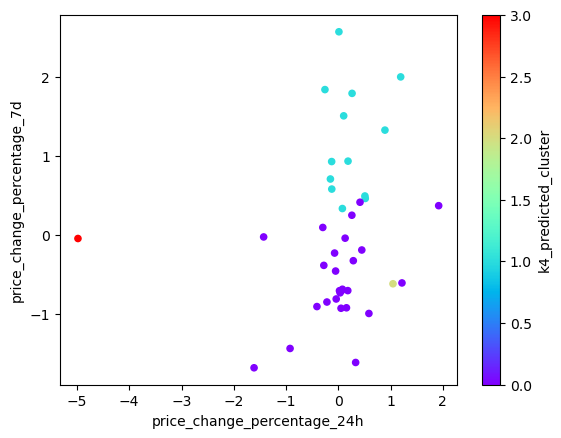

In [19]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
cluster_df.plot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c='k4_predicted_cluster',
    colormap='rainbow'
)

### Optimize Clusters with Principal Component Analysis.

In [20]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [23]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
pca_market_data = pca.fit_transform(market_data_scaled)
pca_market_data_df = pd.DataFrame(pca_market_data, columns=["PCA1", "PCA2", "PCA3"], index=market_data_scaled.index)

# View the first five rows of the DataFrame. 
pca_market_data_df.head()

,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


In [24]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:Approximately 90%

## The next section is asking duplicate questions of the data frame above: pca_market_data_df

In [25]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you

# Creating a DataFrame with the PCA data


# Copy the crypto names from the original data


# Set the coinid column as index


# Display sample data
pca_market_data_df.head()

,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


### Find the Best Value for k Using the PCA Data

In [35]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_value2 = list(range(1,12))

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list
for k in k_value2:
    model = KMeans(n_clusters=k, n_init='auto',random_state=1)
    model.fit(pca_market_data_df)
    inertia.append(model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow2 = {'k': k_values_list, 'inertia': inertia }

# Create a DataFrame with the data to plot the Elbow curve
elbow3 = pd.DataFrame(elbow2)

# Display the DataFrame
elbow2

c:\Users\Natalii\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Natalii\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Natalii\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Natalii\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak o

{'k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 'inertia': [256.8740855678923,
  182.33953007775642,
  135.44240762454203,
  49.66549665179737,
  38.67258217591795,
  34.507576537581535,
  23.72836478127476,
  18.574523440183196,
  15.57267221043334,
  11.407666572096918,
  8.058821888712735]}

<Axes: xlabel='k'>

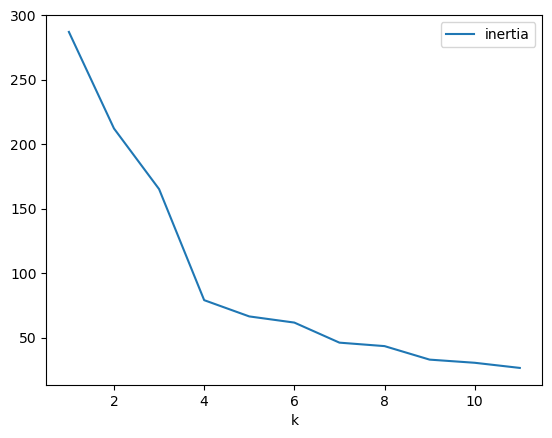

In [38]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_df.plot(
    x='k',
    y='inertia'
)

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:Not really. 

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [39]:
# Initialize the K-Means model using the best value for k
k_pca = KMeans(n_clusters=4, n_init= 'auto')

In [40]:
# Fit the K-Means model using the PCA data
k_pca.fit(pca_market_data_df)

c:\Users\Natalii\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, n_init='auto')

In [41]:
# Predict the clusters to group the cryptocurrencies using the PCA data
k_pca_predict = k_pca.predict(pca_market_data)

# Print the resulting array of cluster values.
k_pca_predict

c:\Users\Natalii\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 0, 3, 0, 0, 0, 0])

In [42]:
# Create a copy of the DataFrame with the PCA data
pca_copy_df = pca_market_data_df.copy()

# Add a new column to the DataFrame with the predicted clusters
pca_copy_df['k4_clusters'] = k_pca_predict


# Display sample data
pca_copy_df.head()

,PCA1,PCA2,PCA3,k4_clusters
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2


<Axes: xlabel='PCA1', ylabel='PCA2'>

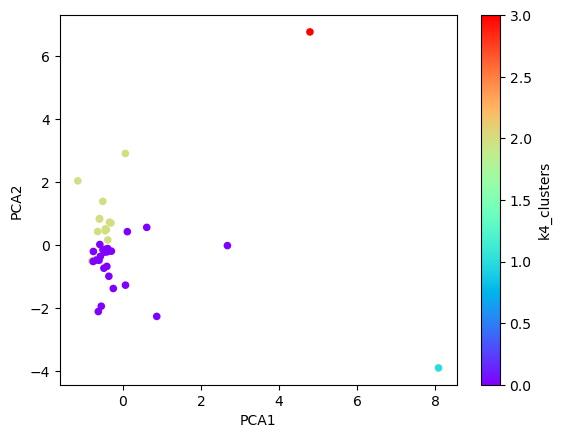

In [44]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
pca_copy_df.plot.scatter(
    x="PCA1",
    y="PCA2",
    c='k4_clusters',
    colormap='rainbow'
)

### Determine the Weights of Each Feature on each Principal Component

In [46]:
# Use the columns from the original scaled DataFrame as the index.
market_data_scaled = pd.DataFrame(pca.components_.T,columns=['PCA1','PCA2','PCA3'],index=market_data_df.columns)
market_data_scaled

,PCA1,PCA2,PCA3
price_change_percentage_24h,-0.416728,0.358162,-0.218795
price_change_percentage_7d,-0.102432,0.227432,0.787670
price_change_percentage_14d,-0.009162,0.540415,0.349534
price_change_percentage_30d,0.191523,0.562182,-0.181744
price_change_percentage_60d,0.320365,0.434040,-0.361377
price_change_percentage_200d,0.594468,0.027735,0.039733
price_change_percentage_1y,0.568379,-0.150789,0.210541


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** 

   PCA1: Highest == price_change_percentage_200d . Lowest == price_change_percentage_24h
   PCA2: Highest == price_change_percentage_30d . Lowest == price_change_percentage_1y
   PCA3: Highest == price_change_percentage_7d . Lowest == price_change_percentage_60d